In [3]:
!pip install visualkeras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import visualkeras
from PIL import ImageFont
import PIL


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Do not forget to connect to GPU runtime before training**

In [4]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

170498071/170498071 [==============================] - 6s 0us/step


In [5]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(35000, 32, 32, 3)
(35000, 1)
(15000, 32, 32, 3)
(15000, 1)


In [6]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
# Normalizing the values between -1 and 1

X_train  = X_train/255
X_test = X_test/255

In [8]:
# Create an ImageDataGenerator object with given augmentation settings(just an instance)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,      # Random rotation within the range of [-20, 20] degrees
    width_shift_range=0.1,  # Random horizontal shift within the range of [-0.1, 0.1] of the total width
    height_shift_range=0.1, # Random vertical shift within the range of [-0.1, 0.1] of the total height
    shear_range=0.2,        # Random shearing transformations within the range of [-0.2, 0.2]
    zoom_range=0.2,         # Random zoom within the range of [0.8, 1.2]
    horizontal_flip=True,   # Randomly flip inputs horizontally
    fill_mode='nearest' ,    # Fill any newly created pixels with the nearest available pixel value
    validation_split=0.2  # Split 20% of the data for validation
)

# Apply data augmentation to the training data
augmented_images = datagen.flow(X_train, Y_train)

# creating the validation data
validation_data = datagen.flow(X_train, Y_train, subset='validation')

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


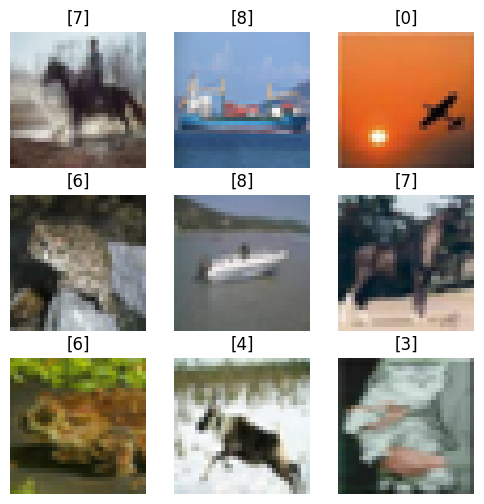

In [27]:
import random
figure = plt.figure(figsize=(6,6))

for i in range(9):
    index = random.randint(0,len(X_train)-1) # showing the index_th image
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[index])
    plt.title(Y_train[index])
    plt.axis(False)

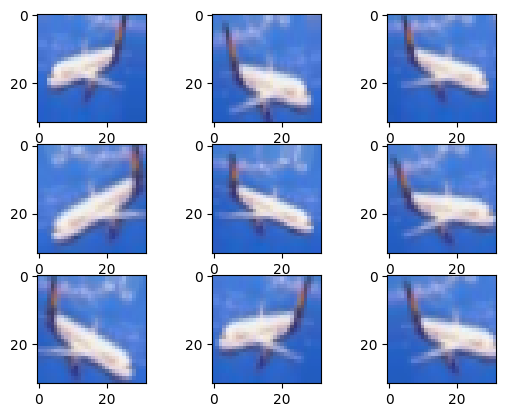

In [29]:
#images after augmentation. RAndom example to show augmented images
ind = random.randint(0,len(X_train)-1)
img = tf.expand_dims(X_train[ind], axis=0)
aug_iterator = datagen.flow(img, batch_size=1)
for i in range(9):
    batch = aug_iterator.next()
    img = batch[0].astype('float32')
    ax = plt.subplot(3, 3, i+1)
    ax.imshow(img)

## **`This is an Open assignment with minimum instructions`**
You are allowed to search all over the web--> find any articles or implement them--> try your experiments

> **---> create the model**\
**---> tune the hyperparameters like learning_rate, filter/kernel size**\
**---> optimize the result**


In [30]:
"""
You have got some experience form last assignment '
Use that experience this time
"""

"\nYou have got some experience form last assignment '\nUse that experience this time\n"

In [31]:
#@title **IMPORTANT ANNOUNCEMENT**
"""
Now with this much freedom, you can do anything
So make sure you understand what you do and after the end of this assignment
 you will have explain all the code you tried in a viva exam
 this will be the mid term evaluation.
"""

'\nNow with this much freedom, you can do anything\nSo make sure you understand what you do and after the end of this assignment\n you will have explain all the code you tried in a viva exam\n this will be the mid term evaluation.\n'

## **YOUR EFFORTS WILL COUNT MORE THE RESULTS YOU GET**
> **So make sure all the time you spent on this notebook should be visible from the notebook**

In [49]:
"""
Question: What is Batch Normalization? Why is it used for? How does it fix the
problem it is used for? [ Answer in atleast 300 words]
<cite your sources>

Answer:
             Normalisation is a process in which we change the input to a common scale before it enters the model which means that its mean is set to 0 and standard deviation to 1.
  It does not affect the ranges between the data as it is maintained in the transformed data.It increases the accuracy of model
  and speeds up the process.When data having large range of values enters the model it causes imbalances in model and the gradients
  takes a much longer time to converge to minimum as it oscillates back and forth many times as we cannot do it with higher learning rate
  we need to keep our learning rate low which increases the time it takes to achieve it.This problem can be solved by using
  normalization as it makes sure that different features have similar ranges so that gradient descent converge more quickly.
  Batch normalisation is a technique in deep learning which helps to normalise the data through each layers in neural network.
  It stabilizes the model and improves the performance of the model.The neural network trains itself by updating the weights during
  training process.During the process of updating the weights the input of a layer depends upon the activated output of the previous
  layer which depends on updated weights.The distribution of input from previous layer is constantly changing which makes the training of neural
  network difficult and unstable which is also called Internal Covariate Shift.What batch normalisation do is that it ensures that
  the distribution at particular layer is such that mean = 0 and standard deviation = 1,which reduces internal covariate shift and
  makes the training fast.If during the process the weight of a particular neuron is very high then it will affect the
  output which will the be the input of another neuron causing imbalance within the neural network.Batch normalisation ensures
  that weights within the network doesnot become too high or low.Advantages of using batch normalisation.
  1)It helps in faster convergence during training by reducing internal covariate shift.
  2)Can also act as a regularizer by helping in reducing overfitting.
  3)It increases the stability of the data as the model can tolerate to the range of input data.
  4)It improves the model performance and helps in generalisation.
  How it works -
  1) Calculate the mean(u) and variance(v) of input layers.
  2) Normalise the input layer -> zi = (xi-u)/v+E
     where E is error term.
  3) Scale and shift the normalised term -
     T = y(zi) + B
     where y,B are parameters that are learned during the network.
     These paramaters are trainable and are updated during backpropagation just like other parameters in model.

     links- 1)https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/
            2)https://youtu.be/2AscwXePInA
            3)https://www.baeldung.com/cs/batch-normalization-cnn



"""

'\nQuestion: What is Batch Normalization? Why is it used for? How does it fix the\nproblem it is used for? [ Answer in atleast 300 words]\n<cite your sources>\n\nAnswer:\n             Normalisation is a process in which we change the input to a common scale before it enters the model which means that its mean is set to 0 and standard deviation to 1.\n  It does not affect the ranges between the data as it is maintained in the transformed data.It increases the accuracy of model\n  and speeds up the process.When data having large range of values enters the model it causes imbalances in model and the gradients\n  takes a much longer time to converge to minimum as it oscillates back and forth many times as we cannot do it with higher learning rate\n  we need to keep our learning rate low which increases the time it takes to achieve it.This problem can be solved by using\n  normalization as it makes sure that different features have similar ranges so that gradient descent converge more quick

In [33]:
"""
Tutorial: https://www.tensorflow.org/tutorials/images/classification

Above tutorial does exactly the same job
But I will zero marks for exact same model used in the tutorial

You need experiment with different layers and all those
experiments should be visible by your notebooks
"""

'\nTutorial: https://www.tensorflow.org/tutorials/images/classification\n\nAbove tutorial does exactly the same job\nBut I will zero marks for exact same model used in the tutorial\n\nYou need experiment with different layers and all those\nexperiments should be visible by your notebooks\n'

In [34]:
# model initialization
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3),padding='same', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(32, (3, 3),padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3),padding='valid'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3),padding='valid'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3),padding='valid'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(128, (3, 3),padding='valid'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [35]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)       

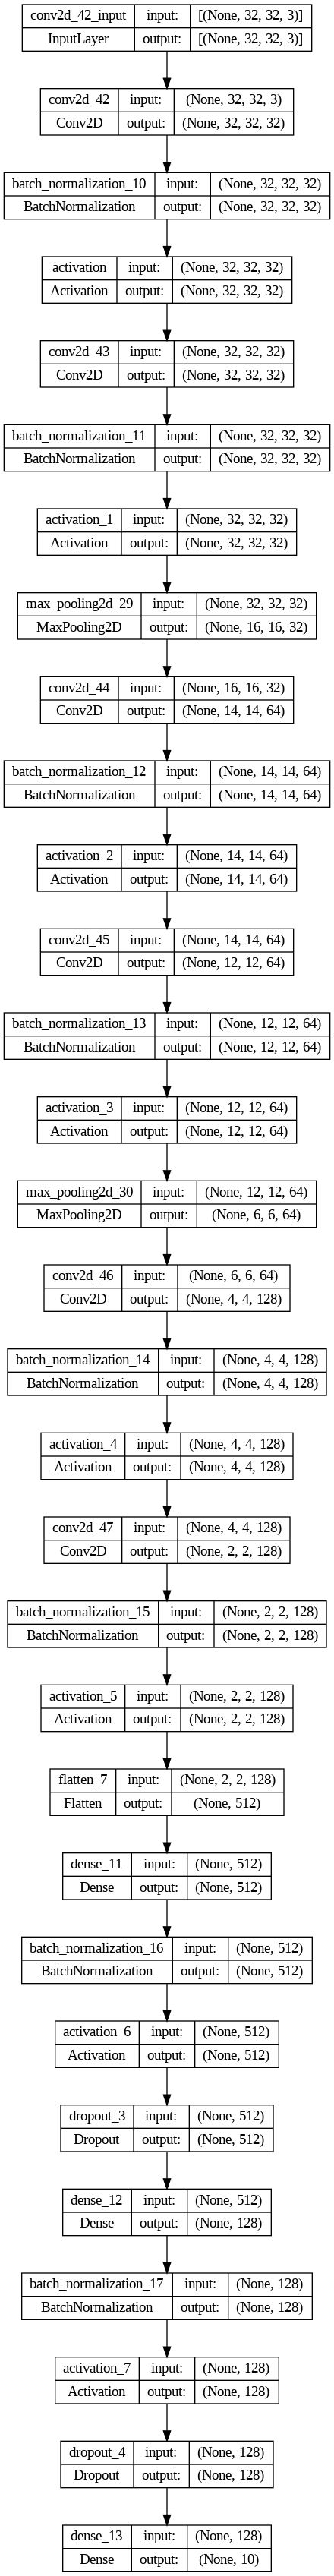

In [36]:
#@title Visualization

# just run this cell as it is
tf.keras.utils.plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

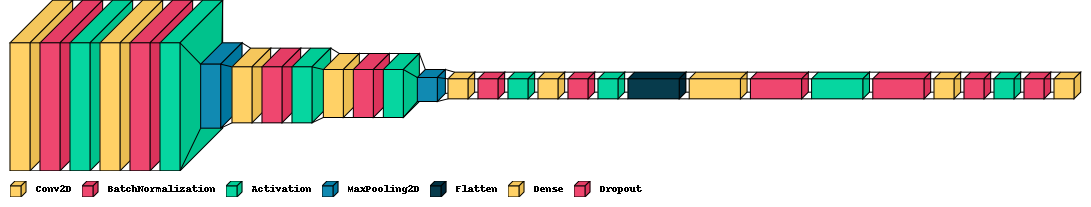

In [37]:
# just run this cell as it is
visualkeras.layered_view(model, legend=True)

In [38]:
"""
In the last part of the assignment
try experimenting with learning rate.
May be decreasing the lr might had help?
"""

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [39]:
# This is another way of dealing with the generated data
# both X_train and Y_train are inside the augmented image

history = model.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1094/1094 [==============================] - 43s 33ms/step - loss: 1.7062 - accuracy: 0.1002 - val_loss: 1.9230 - val_accuracy: 0.1851
Epoch 2/10
1094/1094 [==============================] - 34s 31ms/step - loss: 1.3297 - accuracy: 0.1010 - val_loss: 1.4809 - val_accuracy: 0.0739
Epoch 3/10
1094/1094 [==============================] - 36s 33ms/step - loss: 1.1468 - accuracy: 0.1011 - val_loss: 1.0845 - val_accuracy: 0.0701
Epoch 4/10
1094/1094 [==============================] - 36s 33ms/step - loss: 1.0392 - accuracy: 0.1027 - val_loss: 1.1683 - val_accuracy: 0.1036
Epoch 5/10
1094/1094 [==============================] - 36s 33ms/step - loss: 0.9741 - accuracy: 0.0999 - val_loss: 1.2076 - val_accuracy: 0.0769
Epoch 6/10
1094/1094 [==============================] - 35s 32ms/step - loss: 0.9104 - accuracy: 0.1007 - val_loss: 0.8668 - val_accuracy: 0.0721
Epoch 7/10
1094/1094 [==============================] - 35s 32ms/step - loss: 0.8742 - accuracy: 0.1031 - val_loss: 0.8184 - val_accura

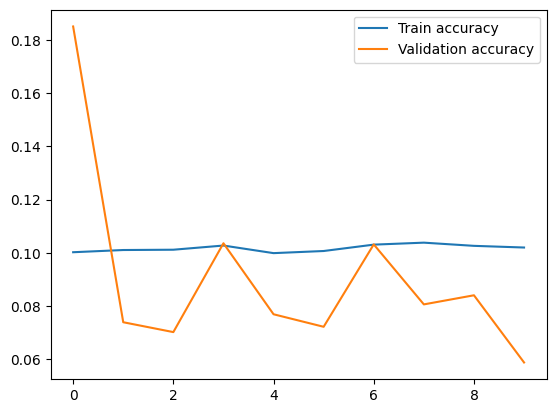

In [40]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [43]:
 t = model.evaluate(X_test,Y_test)
 print(t)

469/469 [==============================] - 2s 4ms/step - loss: 0.9591 - accuracy: 0.0493
[0.9591338038444519, 0.049266666173934937]


## **TRY DIFFERENT MODELS AND COMPARE THE RESULTS**

In [23]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Conv2D(32, (3, 3),padding='same', input_shape=(32, 32, 3),activation='relu'))
model1.add(tf.keras.layers.Conv2D(32, (3, 3),padding='same',activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D((2,2)))
model1.add(tf.keras.layers.Conv2D(64, (3, 3),padding='same',activation='relu'))
model1.add(tf.keras.layers.Conv2D(64, (3, 3),padding='same',activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D((2,2)))
model1.add(tf.keras.layers.Conv2D(128, (3, 3),padding='same',activation='relu'))
model1.add(tf.keras.layers.Conv2D(128, (3, 3),padding='same',activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D((2,2)))
model1.add(tf.keras.layers.Conv2D(256, (3, 3),padding='same',activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D((2,2)))
model1.add(tf.keras.layers.Conv2D(256, (3, 3),padding='same',activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D((2,2)))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dense(128,activation='relu'))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dense(128,activation='relu'))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [24]:

model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

history1 = model1.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10
1094/1094 [==============================] - 41s 31ms/step - loss: 1.8041 - accuracy: 0.0955 - val_loss: 2.0968 - val_accuracy: 0.0581
Epoch 2/10
1094/1094 [==============================] - 37s 34ms/step - loss: 1.4982 - accuracy: 0.0977 - val_loss: 1.7219 - val_accuracy: 0.2061
Epoch 3/10
1094/1094 [==============================] - 35s 32ms/step - loss: 1.3154 - accuracy: 0.0971 - val_loss: 1.6688 - val_accuracy: 0.1139
Epoch 4/10
1094/1094 [==============================] - 35s 32ms/step - loss: 1.1954 - accuracy: 0.0982 - val_loss: 1.4942 - val_accuracy: 0.0693
Epoch 5/10
1094/1094 [==============================] - 35s 32ms/step - loss: 1.0918 - accuracy: 0.0989 - val_loss: 1.3304 - val_accuracy: 0.0837
Epoch 6/10
1094/1094 [==============================] - 34s 31ms/step - loss: 1.0233 - accuracy: 0.0991 - val_loss: 1.0009 - val_accuracy: 0.1134
Epoch 7/10
1094/1094 [==============================] - 34s 31ms/step - loss: 0.9902 - accuracy: 0.1011 - val_loss: 1.2436 -

In [25]:
t1 = model1.evaluate(X_test,Y_test)
print(t1)

469/469 [==============================] - 2s 4ms/step - loss: 0.8891 - accuracy: 0.0911
[0.8890677690505981, 0.09113333374261856]


In [45]:

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', input_shape=(32,32,3),activation = 'relu'))
model2.add(tf.keras.layers.Conv2D(32, (3, 3),activation = 'relu'))
model2.add(tf.keras.layers.MaxPooling2D((2, 2)))


model2.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same',activation = 'relu'))
model2.add(tf.keras.layers.Conv2D(64, (3, 3),activation = 'relu'))
model2.add(tf.keras.layers.MaxPooling2D((2, 2)))


model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(512,activation = 'relu'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(10,activation='softmax'))

In [46]:

model2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0008),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

history2 = model2.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10
1094/1094 [==============================] - 33s 28ms/step - loss: 1.7393 - accuracy: 0.1134 - val_loss: 1.5073 - val_accuracy: 0.0537
Epoch 2/10
1094/1094 [==============================] - 30s 28ms/step - loss: 1.4183 - accuracy: 0.0944 - val_loss: 1.2628 - val_accuracy: 0.0877
Epoch 3/10
1094/1094 [==============================] - 31s 28ms/step - loss: 1.2574 - accuracy: 0.0961 - val_loss: 1.1473 - val_accuracy: 0.0664
Epoch 4/10
1094/1094 [==============================] - 32s 29ms/step - loss: 1.1691 - accuracy: 0.0985 - val_loss: 1.0742 - val_accuracy: 0.1043
Epoch 5/10
1094/1094 [==============================] - 31s 29ms/step - loss: 1.1081 - accuracy: 0.0989 - val_loss: 1.0001 - val_accuracy: 0.0724
Epoch 6/10
1094/1094 [==============================] - 30s 28ms/step - loss: 1.0518 - accuracy: 0.0983 - val_loss: 0.9660 - val_accuracy: 0.0926
Epoch 7/10
1094/1094 [==============================] - 30s 28ms/step - loss: 1.0112 - accuracy: 0.0991 - val_loss: 0.9018 -

In [47]:
t2 = model2.evaluate(X_test,Y_test)
print(t2)

469/469 [==============================] - 2s 4ms/step - loss: 0.7962 - accuracy: 0.0949
[0.7962185740470886, 0.09493333101272583]


In [11]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', input_shape=(32,32,3),activation = 'relu'))
model3.add(tf.keras.layers.MaxPooling2D((2, 2)))
model3.add(tf.keras.layers.Conv2D(32, (3, 3),activation = 'relu'))
model3.add(tf.keras.layers.MaxPooling2D((2, 2)))
model3.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same',activation = 'relu'))
model3.add(tf.keras.layers.MaxPooling2D((2, 2)))
model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(500,activation = 'relu'))
model3.add(tf.keras.layers.Dropout(0.4))
model3.add(tf.keras.layers.Dense(10,activation='softmax'))

In [12]:

model3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

history3 = model3.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10
1094/1094 [==============================] - 43s 28ms/step - loss: 1.7663 - accuracy: 0.0972 - val_loss: 1.5728 - val_accuracy: 0.1170
Epoch 2/10
1094/1094 [==============================] - 30s 27ms/step - loss: 1.5024 - accuracy: 0.0936 - val_loss: 1.4056 - val_accuracy: 0.0603
Epoch 3/10
1094/1094 [==============================] - 30s 27ms/step - loss: 1.4094 - accuracy: 0.0952 - val_loss: 1.2771 - val_accuracy: 0.0947
Epoch 4/10
1094/1094 [==============================] - 30s 27ms/step - loss: 1.3396 - accuracy: 0.0943 - val_loss: 1.2128 - val_accuracy: 0.1109
Epoch 5/10
1094/1094 [==============================] - 31s 28ms/step - loss: 1.2867 - accuracy: 0.0963 - val_loss: 1.1596 - val_accuracy: 0.1117
Epoch 6/10
1094/1094 [==============================] - 30s 27ms/step - loss: 1.2449 - accuracy: 0.0972 - val_loss: 1.1058 - val_accuracy: 0.1010
Epoch 7/10
1094/1094 [==============================] - 29s 27ms/step - loss: 1.2105 - accuracy: 0.1000 - val_loss: 1.0655 -

In [13]:
t3 = model3.evaluate(X_test,Y_test)
print(t3)

469/469 [==============================] - 1s 3ms/step - loss: 0.9426 - accuracy: 0.1064
[0.9426091313362122, 0.10639999806880951]


In [14]:

model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.Conv2D(32, (4, 4),activation = 'relu'))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.MaxPooling2D((2, 2)))
model4.add(tf.keras.layers.Conv2D(64, (4, 4), padding='same',activation = 'relu'))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.MaxPooling2D((2, 2)))

model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.Dense(512,activation = 'relu'))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.Dense(256,activation = 'relu'))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.Dense(10,activation='softmax'))

In [15]:
model4.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

history4 = model4.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10
1094/1094 [==============================] - 47s 38ms/step - loss: 1.5577 - accuracy: 0.0992 - val_loss: 1.2710 - val_accuracy: 0.0760
Epoch 2/10
1094/1094 [==============================] - 32s 30ms/step - loss: 1.2774 - accuracy: 0.1007 - val_loss: 1.1935 - val_accuracy: 0.0807
Epoch 3/10
1094/1094 [==============================] - 32s 30ms/step - loss: 1.1604 - accuracy: 0.1010 - val_loss: 1.0046 - val_accuracy: 0.1084
Epoch 4/10
1094/1094 [==============================] - 33s 30ms/step - loss: 1.0753 - accuracy: 0.1011 - val_loss: 0.9865 - val_accuracy: 0.0817
Epoch 5/10
1094/1094 [==============================] - 33s 30ms/step - loss: 1.0050 - accuracy: 0.1017 - val_loss: 0.8991 - val_accuracy: 0.0987
Epoch 6/10
1094/1094 [==============================] - 32s 29ms/step - loss: 0.9625 - accuracy: 0.1005 - val_loss: 0.8998 - val_accuracy: 0.1010
Epoch 7/10
1094/1094 [==============================] - 33s 30ms/step - loss: 0.9250 - accuracy: 0.1011 - val_loss: 0.8346 -

In [16]:
t4 = model4.evaluate(X_test,Y_test)
print(t4)

469/469 [==============================] - 2s 3ms/step - loss: 0.7028 - accuracy: 0.0916
[0.7028465270996094, 0.09160000085830688]


In [17]:
model5 = tf.keras.Sequential()
model5.add(tf.keras.layers.Conv2D(32, (3, 3),activation = 'relu',input_shape = (32,32,3)))

model5.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same',activation = 'relu'))
model5.add(tf.keras.layers.MaxPooling2D((2, 2)))
model5.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same',activation = 'relu'))
model5.add(tf.keras.layers.MaxPooling2D((2, 2)))
model5.add(tf.keras.layers.Conv2D(128, (3, 3), padding='valid',activation = 'relu'))
model5.add(tf.keras.layers.MaxPooling2D((2, 2)))
model5.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same',activation = 'relu'))
model5.add(tf.keras.layers.MaxPooling2D((2, 2)))


model5.add(tf.keras.layers.Flatten())
model5.add(tf.keras.layers.Dense(256,activation = 'relu'))
model5.add(tf.keras.layers.Dropout(0.3))
model5.add(tf.keras.layers.Dense(10,activation='softmax'))

In [18]:
model5.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

history5 = model5.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10
1094/1094 [==============================] - 34s 29ms/step - loss: 1.8029 - accuracy: 0.1010 - val_loss: 1.5025 - val_accuracy: 0.0476
Epoch 2/10
1094/1094 [==============================] - 31s 28ms/step - loss: 1.4626 - accuracy: 0.0928 - val_loss: 1.3609 - val_accuracy: 0.1367
Epoch 3/10
1094/1094 [==============================] - 31s 28ms/step - loss: 1.3082 - accuracy: 0.0987 - val_loss: 1.1938 - val_accuracy: 0.1080
Epoch 4/10
1094/1094 [==============================] - 32s 29ms/step - loss: 1.2094 - accuracy: 0.1003 - val_loss: 1.0990 - val_accuracy: 0.0867
Epoch 5/10
1094/1094 [==============================] - 31s 28ms/step - loss: 1.1333 - accuracy: 0.1014 - val_loss: 1.0513 - val_accuracy: 0.0849
Epoch 6/10
1094/1094 [==============================] - 30s 27ms/step - loss: 1.0747 - accuracy: 0.1011 - val_loss: 0.9787 - val_accuracy: 0.1236
Epoch 7/10
1094/1094 [==============================] - 31s 28ms/step - loss: 1.0187 - accuracy: 0.1002 - val_loss: 0.9506 -

In [19]:
t5 = model5.evaluate(X_test,Y_test)
print(t5)

469/469 [==============================] - 2s 4ms/step - loss: 0.7890 - accuracy: 0.1143
[0.7889544367790222, 0.11426666378974915]


In [48]:
print(t)
print(t1)
print(t2)
print(t3)
print(t4)
print(t5)

[0.9591338038444519, 0.049266666173934937]
[0.8890677690505981, 0.09113333374261856]
[0.7962185740470886, 0.09493333101272583]
[0.9426091313362122, 0.10639999806880951]
[0.7028465270996094, 0.09160000085830688]
[0.7889544367790222, 0.11426666378974915]


Model5 accuracy is better than than the rest.